### Exemplo de aplicação Máquinas de Vetores de Suporte (SVMs):

- Usando o [Scikit](https://scikit-learn.org/stable/modules/svm.html)

**Principais vantagens das SVMs**

*   São efetivas em espaços de altas dimensões
*   Efetivas em casos onde o número de dimensões é maior que o número de amostras
*   Usa um subconjunto de pontos de treinamento na função de decisão (chamada de vetores de suporte), então é eficiente em termos de uso de memória
*   É versátil: diferentes funções de *kernel* podem ser especificadas para a função de decisão. Alguns *kernels* mais comuns são fornecidos.



**Principais desvantagens das SVMs**

*    Se o número de características é muito maior do que o número de amostras, a escolha adequada das funções de *kernel* e do termo de regularização para se evitar *over-fitting* é crucial.
*    As SVMs não são capazes de estimar probabilidades diretamente. Estas estimativas são feitas usando *validação cruzada de cinco etapas (five-fold cross-validation)*, que é muito custosa.

A **validação cruzada** é uma técnica para avaliar a capacidade de generalização de um modelo. É feito um particionamento do conjunto de dados em subconjuntos mutuamente exclusivos (de treinamento e de testes). 

Uma das formas de fazer esse particionamento é usar o método *k-fold*. Nesse caso, se divide o conjunto  de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho. Então, um subconjunto é usado para testes e os restantes são usados para a estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. O processo é repedido k vezes, alternando-se de forma circular o subconjunto de teste. Ao final do processo, calcula-se a acurácia.

Lembrar que acurácia é diferente de precisão. A **acurácia** tem a ver com exatidão com relação a um valor de referência. Já a **precisão** tem a ver com a proximidade entre os valores obtidos pela repetição do processo de medição, isto é, a tolerância do erro de medição para um determinado medidor. Assim, a acurácia depende da correta calibração do medidor, enquanto a precisão depende do nível de interferência e do ruído que afetam a medida.

# **Classificação**

Vamos usar o [SciKit Learn](https://scikit-learn.org/stable/index.html) nos nossos experimentos com SVMs.

Para classificação binária e de múltiplas classes temos disponíveis as classes:

*    [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (*C-Support Vector Classification*): O tempo é, pelo menos, quadraticamente proporcional ao número de amostras e pode ser inviável além de dezenas de milhares de amostras.

*    [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC): É semelhante a SVC, mas usa um parâmetro para controlar o número de vetores de suporte.

*    [LinearSVC ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC): também semelhante à SVC, mas com maior flexibilidade na escolha das penalidades e na função de perda. Pode escalar melhor para grandes números de exemplos.




Os dois primeiros métodos são similares, mas aceitam conjuntos de parâmetros ligeiramente diferentes. Já o terceiro é uma implementação mais rápida para o caso de um *kernel* linear. Ela não aceita o parâmetro *kernel*,  uma vez que é assumido que ele seja linear.

A entrada para esses métodos é um array **x** da forma **(n_amostras, n_características)** com os exemplos de treino, e um array **y** com as classes dos rótulos (strings ou inteiros) da forma **(n_amostras)**.

In [ ]:
from sklearn import svm

In [ ]:
X = [[0, 0], [1, 1]] # array com as amostras e características
y = [0, 1] # array com os rótulos (classificações)
clf = svm.SVC()
clf.fit(X, y) # Ajustar o modelo

SVC()

In [ ]:
clf.predict([[2., 2.]]) # predição para novos valores

array([1])

A função de decisão das SVMs depende de um subconjunto dos dados de treinamento, os **vetores de suporte**. Algumas propriedades destes vetores de suporte podem ser obtidas por meio dos atributos *support_vectors_*, *support_* e *n_support_*:

In [ ]:
clf.support_vectors_ # Obtém os vetores de suporte

array([[0., 0.],
       [1., 1.]])

In [ ]:
clf.support_ # Obtém os índices dos vetores de suporte

array([0, 1], dtype=int32)

In [ ]:
clf.n_support_ # Obtém o número de vetores de suporte em cada classe

array([1, 1], dtype=int32)

**Exemplo 01:** hiperplano de máxima margem de separação

Plotar um hiperplano com máxima margem de separação entre duas classes, usando um classificar SVM com kernel linear.

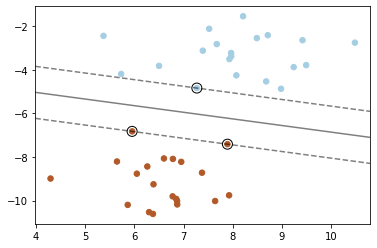

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# Criar 40 pontos separáveis
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Ajustar o modelo (não regularizar por razões de ilustração)
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plotar a função de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Criar um grid para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plotar os limites e as margens de decisão
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# Plotar os vetores de suporte
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

**Exemplo 02:** Fazer uma classificação binária usando um SVC não linear com kernel RBF. O objetivo de previsão deve ser um XOR das entradas.

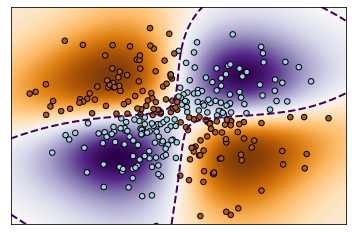

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Ajustar o modelo
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# Plotar a função de decisão para cada ponto no grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

**Exemplo 03:** SVM-Anova: uma SVM com seleção univariada de característica: este exemplo mostra como implementar uma seleção de univariada (uma variável por vez) de característica, antes de usar um classificador SVC (support vector classifier) para melhorar o desempenho da classificação. Usaremos o dataset iris (4 características) e acrescentaremos 36 características não informativas. Podemos verificar que nosso modelo obtém a melhor performance quando selecionamos por volta de 10% das características.

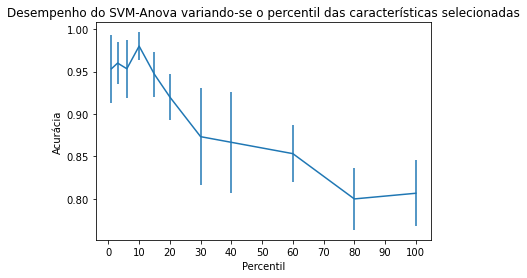

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Importação dos dados
X, y = load_iris(return_X_y=True)
# Acrescentando características não informativas
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Criando uma transformação para seleção de características, um scaler e 
# uma instância da SVM que serão combinadas para obter um estimador completo
clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

# #############################################################################
# Plotar o score da validação cruzada como uma função percentil das características
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Desempenho do SVM-Anova variando-se o percentil das características selecionadas")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentil")
plt.ylabel("Acurácia")
plt.axis("tight")
plt.show()

## **Classificação multi-classes**

SVC e NuSVC implementam a abordagem "um para um" para a classificação multi-classes. Ao todo, são construídos *(n_classes . (n_classes -1)/2)* classificadores e cada um é treinado com dados de duas classes. Para prover uma interface consistente com outros classificadores, a opção **decision_function_shame** permite monotonicamente transformar os resultados da abordagem "um para um" dos classificadores para a uma função de decisão da forma **(n_amostras, n_classes)** para a abordagem "um para o resto".

In [ ]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo') # um para um
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

In [ ]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [ ]:
clf.decision_function_shape = "ovr" #um para o resto
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

Já o LinearSVC implementa a estratégia "um para o resto" na classificação multi-classes.

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC()

In [ ]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

##**Funções de kernel**

* linear: $<x, x'>$

* polynomial: $(\gamma <x, x' > + r )^d $ , onde **d** é especificado por um parâmetro grau, e **r** por *coef0*.

* rbf: $ exp( -\gamma ||x - x'||^2)$, onde $\gamma$ é especificado pelo parâmetro gama, de valor maior que 0.

* sigmoid: $ \tanh( \gamma<x,x'> +r) $, onde **r** é especificado por *coef0*.



**Parâmetros do kernel**

Kernels diferentes são especificados pelo parâmetro *kernel*:

In [ ]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

Quando se treina uma SVM com o kernel *Radial Basis Function (RBF)*, dois parâmetros devem ser considerados: o parâmetro **c** e o parâmetro $\gamma$. O primeiro é comum para todos os Kernels SVM e define o custo beneficio entre admitir erros de classificação no conjunto de treinamento e a simplicidade da superfície de decisão. Um baixo valor de **c** torna a superfície de decisão mais plana, enquanto que valores altos visam classificar corretamente todos os exemplos do conjunto de treinamento.

O parâmetro $\gamma$ define quanta influência um único exemplo de treinamento tem. Quando mais alto o valor de $\gamma$, mais próximos os outros exemplos devem estar para serem afetados.

Uma escolha adequada desses dois parâmetros é crítica para a performance de uma SVM.

* É possível também definir um *kernel* personalizado fornecendo uma função python ou precomputando uma matrix Gram.


Uma **função python** que defina um *kernel* deve tomar duas matrizes da forma (n_amostras_1, n_características_1), (n_amostras_2, n_características_2) e retornar uma matriz da forma (n_amostras_1, n_amostras_2)

In [3]:
import numpy as np
from sklearn import svm

def my_kernel(X, Y):
  return np.dot(X, Y.T)

In [4]:
clf = svm.SVC(kernel=my_kernel)

###Exemplo:

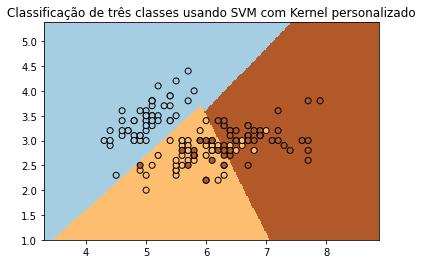

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# importando os dados
iris = datasets.load_iris()
X = iris.data[:, :2]  # usaremos apenas as duas primeiras características
# Pode-se fazer um código mais elegante usando a dataset de duas dimensões
Y = iris.target


def my_kernel(X, Y):
    """
    Criamos um kernel personalizado:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # tamanho do passo na malha

# criamos uma instância da SVM e fazemos a ajuste dos dados
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plotamos a fronteira de decisão. Associamos uma cor para cada ponto
# na malha [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Colocamos o resultado em um gráfico colorido
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plotamos também os pontos de treino
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Classificação de três classes usando SVM com Kernel personalizado")
plt.axis("tight")
plt.show()

Podemos também usar um kernel já precomputado (*kernel = 'precomputed'*), passando uma **matriz Gram** para os métodos *fit* e *predict*. Devem ser fornecidos os valores de todos os vetores de treinamento e de teste.

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm

X, y = make_classification(n_samples=10, random_state=0)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')


In [13]:
# computação do kernel linear
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)


SVC(kernel='precomputed')

In [14]:
# predição sobre os exemplos de treinno
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array([0, 1, 0])